<a href="https://colab.research.google.com/github/scrunts23/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [10]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-22 02:23:37--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  36.4MB/s    in 5.8s    

2020-01-22 02:23:43 (33.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [11]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [12]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [13]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np

In [19]:
# inspect the aisles csv
aisles = pd.read_csv('aisles.csv')

aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
# inspect the departments csv
departments = pd.read_csv('departments.csv')

departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
# inspect the order_products__prior csv
order_products__prior = pd.read_csv('order_products__prior.csv')

order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [22]:
# inspect the order_products__train csv
order_products__train = pd.read_csv('order_products__train.csv')

order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [23]:
# inspect the orders csv
orders = pd.read_csv('orders.csv')

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [24]:
# inspect the products csv
products = pd.read_csv('products.csv')

products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### csv's that are not needed


*   Aisles
*   Orders

#### what we need

*   order_id, product_id, add_to_cart_order, re_ordered
*   what we need to do first:

    *   order_products (merge this first
    *   need product_id and product_name from the product.csv

        *   the common key (to be used) is product_id












In [25]:
# concat orders 
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [26]:
# place into a single dataframe
products_col = ['product_id', 'product_name']
order_col = ['order_id', 'product_id']
merged = pd.merge(products[products_col], order_products[order_col], how='inner', on='product_id')
merged.head()

,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,1107
1,1,Chocolate Sandwich Cookies,5319
2,1,Chocolate Sandwich Cookies,7540
3,1,Chocolate Sandwich Cookies,9228
4,1,Chocolate Sandwich Cookies,9273


In [27]:
# from last lesson, find the 10 most frequently ordered products 
merged['product_name'].value_counts(dropna=False)[:10]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [7]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [2]:
## table2 -> tidy
# taking a look at the row index and it as a column
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [3]:
# fixing data that I want in my tidy column
tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [4]:
# rename columns
tidy1 = tidy1.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [5]:
# creating tidy with condition 
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [6]:
# tidy -> table2
wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
# load in seaborn and dataset 
import seaborn as sns
flights = sns.load_dataset('flights')

In [2]:
# Flights Pivot Table
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [3]:
# pivot table 
flights_table = flights.pivot_table(index='year',
                    columns='month',
                    values='passengers')
                    
flights_table

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


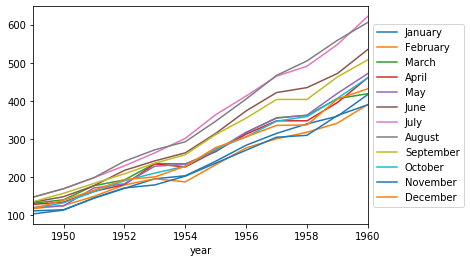

In [6]:
# inspect flight table plot 
flights_table.plot();

# import matplotlib to help with legend on top of data
import matplotlib.pyplot as plt
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
# get value counts of order prouducts by product id
order_product_counts = order_products["product_id"].value_counts()

In [0]:
# sort/make new data table based on popular products that are ordered more that 2900 times
popular = order_product_counts[order_product_counts > 2900].index

In [30]:
# creat a new table 
popular_products = order_products[order_products["product_id"].isin(popular)]
popular_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
5,2,17794,6,1
9,3,33754,1,1


In [0]:
# create a new with order id to prep to create list of popular products
merged = popular_products.merge(orders, how="inner", on="order_id")

In [32]:
# inspect newly merged table 
merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,17794,6,1,202279,prior,3,5,9,8.0
4,3,33754,1,1,205970,prior,16,5,17,12.0


In [0]:
# merge sorted values by 
merged = merged.pivot_table(values="order_hour_of_day", index="product_id", aggfunc=np.mean)

In [0]:
# merge sorted values by order hour of the day
products_by_hour = merged.sort_values(by="order_hour_of_day", ascending=False)

In [39]:
# inspect the table of the late products that were ordered
late_products = products.merge(products_by_hour.head(25), how="inner", on="product_id", sort="order_hour_of_day")
late_products

,product_id,product_name,aisle_id,department_id,order_hour_of_day
0,2361,Mint Chip,37,1,14.189235
1,4932,Vanilla Bean Ice Cream,37,1,14.039406
2,8638,Vanilla Milk Chocolate Almond Ice Cream Bars,37,1,14.104662
3,12276,Chocolate Chip Cookie Dough Ice Cream,37,1,14.204325
4,13885,Caramel Cookie Crunch Gelato,37,1,14.224069
5,14335,Phish Food® Ice Cream,37,1,14.373308
6,17334,Coffee Ice Cream,37,1,14.256280
7,20754,Mediterranean Mint Gelato,37,1,14.233542
8,21463,Vanilla Bean Light Ice Cream,37,1,14.257849
9,22620,Chocolate Peanut Butter Ice Cream,37,1,14.120449


In [36]:
# inspect table of early products that are ordered 
early_products = products.merge(products_by_hour.tail(25), how="inner", on="product_id", sort="order_hour_of_day")
early_products

,product_id,product_name,aisle_id,department_id,order_hour_of_day
0,3798,Pink Lady Apples,24,4,12.330913
1,6184,Clementines,32,4,12.368174
2,9292,Half And Half Ultra Pasteurized,84,16,11.767279
3,10441,Dry Roasted Almonds,117,19,12.151995
4,10473,Half And Half Cream,53,16,12.374539
5,12427,Original Beef Jerky,23,19,12.270420
6,13042,with Crispy Almonds Cereal,121,14,12.348542
7,13575,Apples,24,4,12.123962
8,13914,Cheez-It Baked Snack Crackers,78,19,12.140281
9,15541,Original Almondmilk,91,16,12.353126


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)